**Import required libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files

**Load and clean dataset**

In [4]:
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])

df.head()

print(df.isnull().sum())

Saving Mall_Customers.csv to Mall_Customers (1).csv
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Selecting relavant features for clustering**

In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Elbow method (to find number of clusters)**




In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

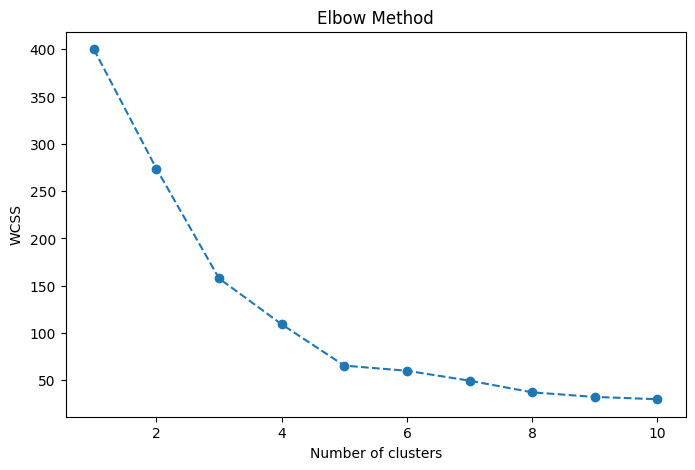

In [7]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


**Training K-Means**

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [9]:
df['Cluster'] = y_kmeans

**Visualize the clusters**

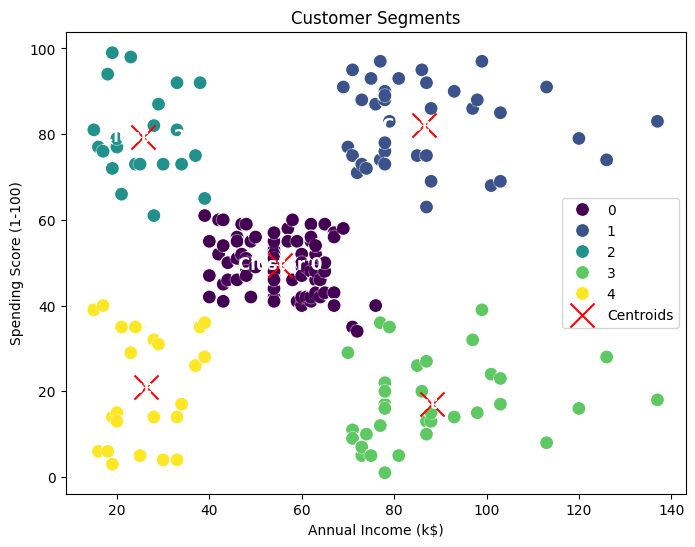

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='viridis',
    s=100
)
plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster'],
    cmap='viridis',
    alpha=0.6
)
# Plot centroids
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    s=300, c='red', label='Centroids', marker='x'
)
# Add cluster labels at centroid positions
for i, (x, y) in enumerate(centers):
    plt.text(x, y, f'Cluster {i}', fontsize=12, fontweight='bold',
             horizontalalignment='center', verticalalignment='center', color='white')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Distribution of clusters**

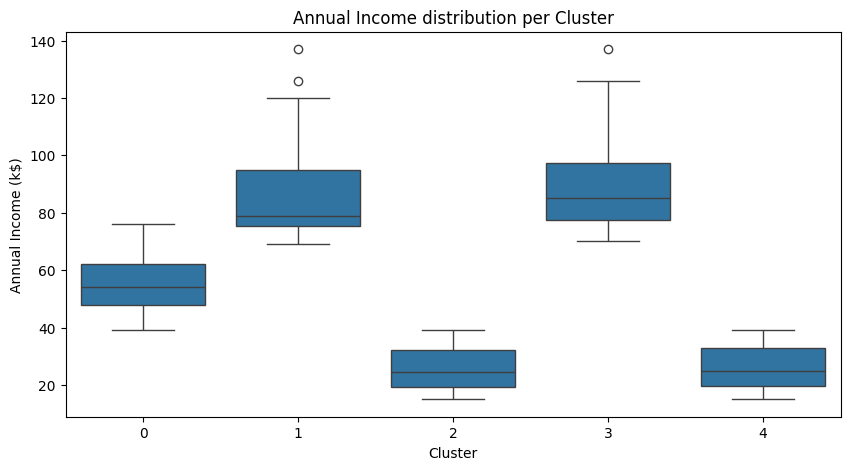

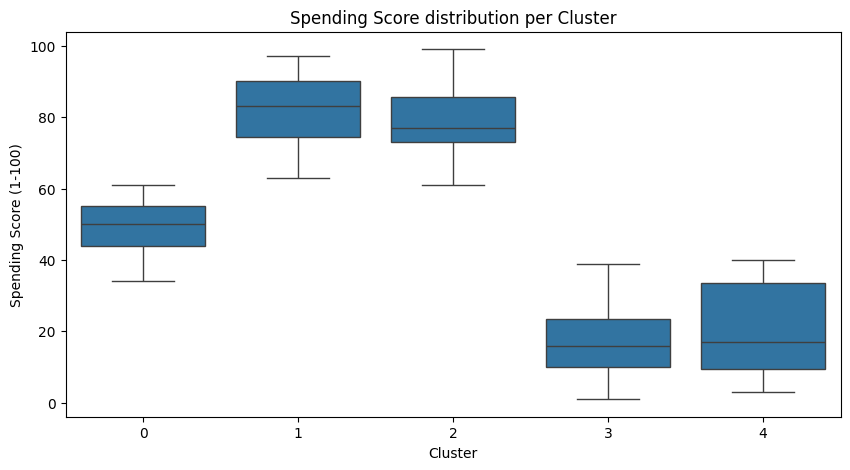

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.title('Annual Income distribution per Cluster')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df)
plt.title('Spending Score distribution per Cluster')
plt.show()

**Save clustered data**

In [13]:
df.to_csv('clustered_customers.csv', index=False)